In [41]:
import scipy

import graspy
from graspy.embed import OmnibusEmbed, ClassicalMDS
from graspy.cluster import GaussianCluster
from graspy.utils import get_multigraph_lcc

import os

import numpy as np

%matplotlib inline

In [8]:
path = '../../data/HNU1/dwi/Talairach/'
files = sorted([f for f in os.listdir(path) if 'npz' in f])

In [19]:
graphs = []
labels = []
for f in files:
    labels.append(f.split('_')[0])
    A = scipy.sparse.load_npz(path + f)
    graphs.append(A.toarray())

## Omni

In [65]:
ptr_before = [graspy.utils.pass_to_ranks(g) for g in graphs]

ValueError: Input graph is not fully connected, please use graspy.utils.find_lcc() to generate a connected graph before import

In [28]:
lccs = get_multigraph_lcc(graphs)

In [35]:
tensor = np.stack(lccs)

In [36]:
tensor.shape

(300, 670, 670)

In [43]:
ptr = [graspy.utils.pass_to_ranks(g) for g in lccs]

In [37]:
omni = OmnibusEmbed()
Zhat = omni.fit_transform(lccs[:100])

In [38]:
Zhat = Zhat.reshape(100, 670, -1)

cmds = ClassicalMDS()
Xhat = cmds.fit_transform(Zhat)

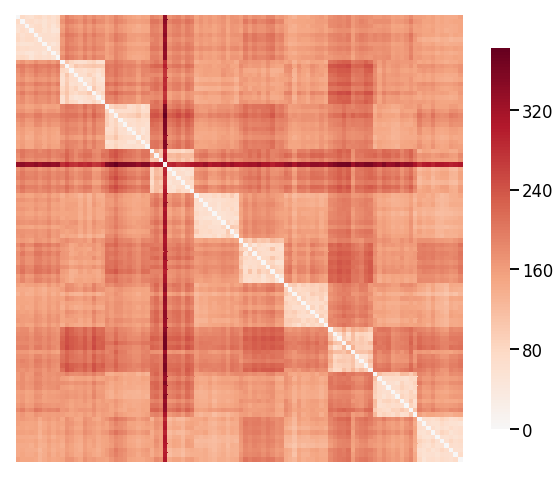

In [42]:
graspy.plot.heatmap(cmds.dissimilarity_matrix_)

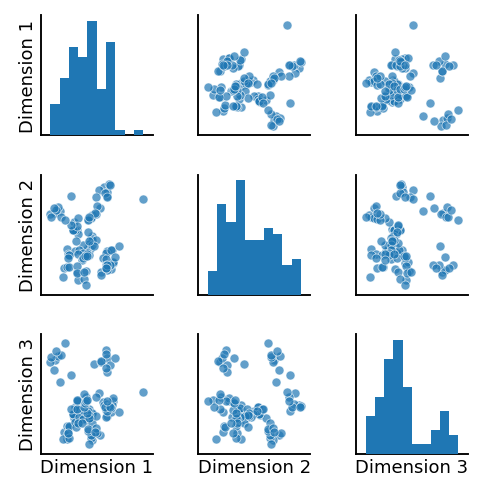

In [45]:
graspy.plot.pairplot(Xhat)

In [50]:
gclust = GaussianCluster(50)
gclust.fit(Xhat, labels[:100])

GaussianCluster(covariance_type='full', max_components=50, random_state=None)

In [55]:
omni = OmnibusEmbed(n_elbows=10)
Zhat_ptr = omni.fit_transform(ptr[:100])

In [57]:
Zhat_ptr = Zhat_ptr.reshape(100, 670, -1)

cmds = ClassicalMDS()
Xhat_ptr = cmds.fit_transform(Zhat_ptr)

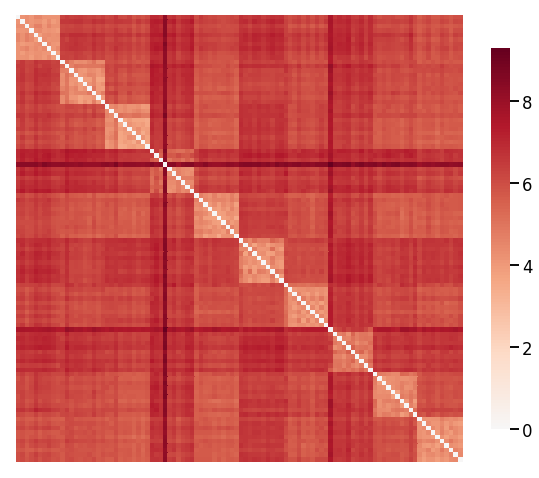

In [76]:
graspy.plot.heatmap(cmds.dissimilarity_matrix_)

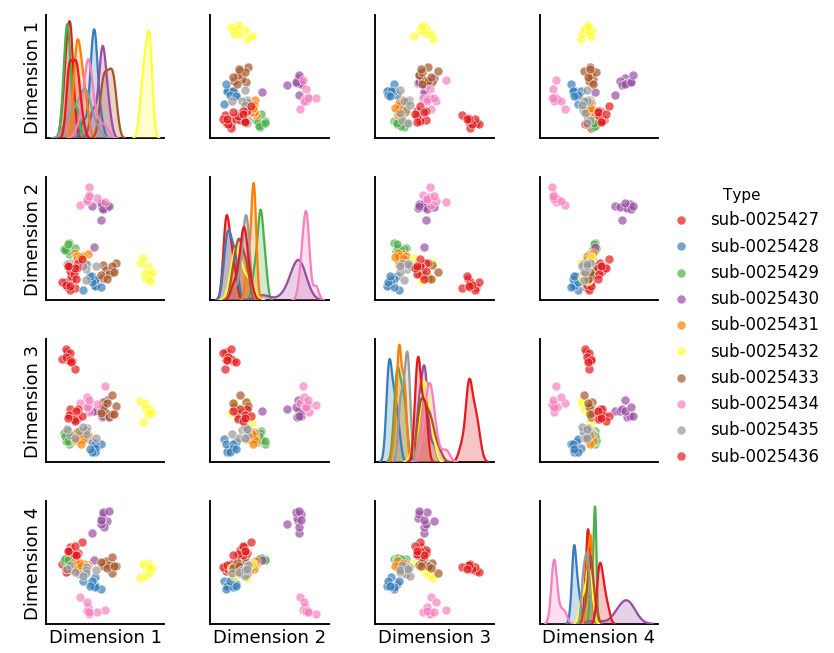

In [63]:
graspy.plot.pairplot(Xhat_ptr, Y=labels[:100])

In [73]:
np.diag(graphs[5]).sum()

0

In [75]:
np.load('../../data/HNU1/dwi/desikan/sub-0025427_ses-10_dwi_desikan.npy')

0.0

In [77]:
import warnings

In [81]:
if True:
    warnings.warn('test', Warning)

/home/j1c/graphstats/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: Warning: test
  
